In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Image Histograms with OpenCV

In [3]:
dark_horse = cv2.imread('C:/Users/dell/Documents/Udemy OpenCV course/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('C:/Users/dell/Documents/Udemy OpenCV course/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)


blue_bricks = cv2.imread('C:/Users/dell/Documents/Udemy OpenCV course/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

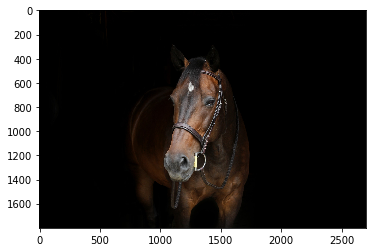

In [4]:
plt.imshow(show_horse)

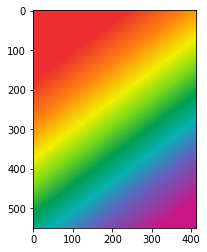

In [5]:
plt.imshow(show_rainbow)

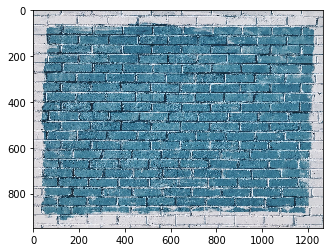

In [6]:
plt.imshow(show_bricks)

# OpenCV Histogram

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

1. **images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.

2. **channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

4. **mask** : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

5. **histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

6. **ranges** : this is our RANGE. Normally, it is [0,256]

In [9]:
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [10]:
hist_values.shape

(256, 1)

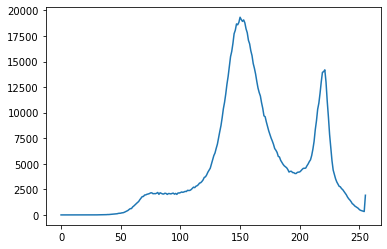

In [11]:
plt.plot(hist_values)

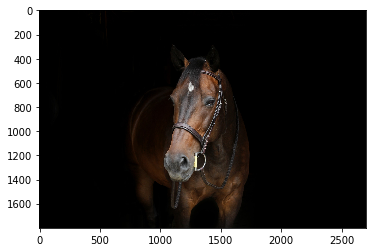

In [15]:
plt.imshow(show_horse)

In [12]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

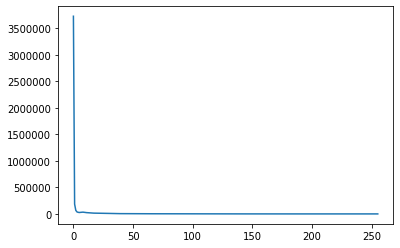

In [13]:
plt.plot(hist_values)

## Plotting multi-color histograms

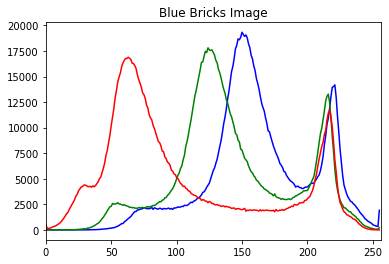

In [16]:
img = blue_bricks
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

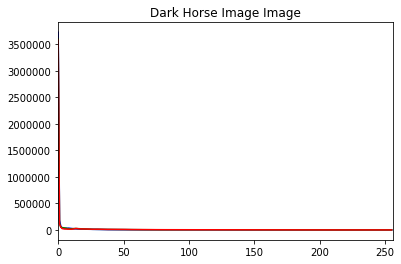

In [17]:
img = dark_horse
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Dark Horse Image Image')
plt.show()

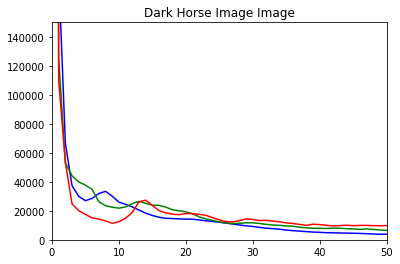

In [20]:
img = dark_horse
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,50])
    plt.ylim([0,150000])
plt.title('Dark Horse Image Image')
plt.show()

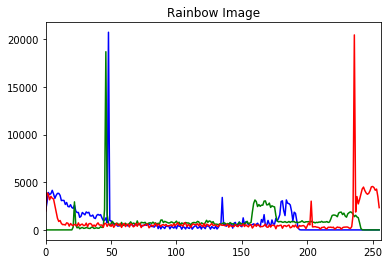

In [21]:
img = rainbow
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

## Masking

In [22]:
img = rainbow

In [23]:
img.shape

(550, 413, 3)

In [24]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255

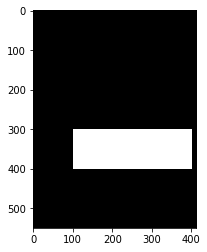

In [30]:
plt.imshow(mask, cmap='gray')

In [33]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask = mask)

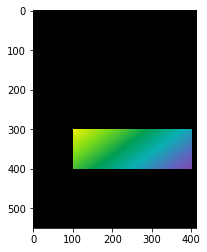

In [34]:
plt.imshow(show_masked_img)

In [35]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'Histogram for RED values of the full image')

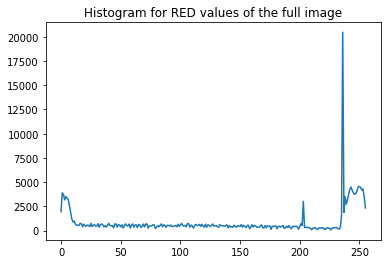

In [36]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of the full image')

Text(0.5, 1.0, 'Histogram for RED values for the Masked Area')

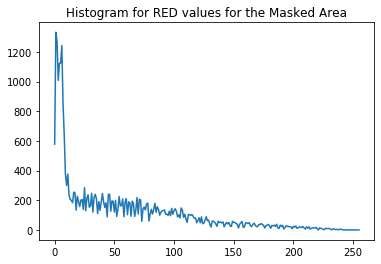

In [37]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values for the Masked Area')

## Histogram Equalization

In [65]:
gorilla = cv2.imread('C:/Users/dell/Documents/Udemy OpenCV course/gorilla.jpg',0)

def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(img,cmap='gray')

In [66]:
show_pic(gorilla, cmap='gray')

TypeError: show_pic() got an unexpected keyword argument 'cmap'

In [45]:
gorilla.shape

(1295, 1955)

In [47]:
hist_values =  cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])

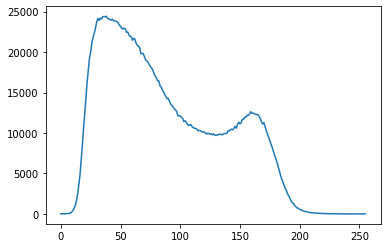

In [48]:
plt.plot(hist_values)

In [49]:
eq_gorilla = cv2.equalizeHist(gorilla)

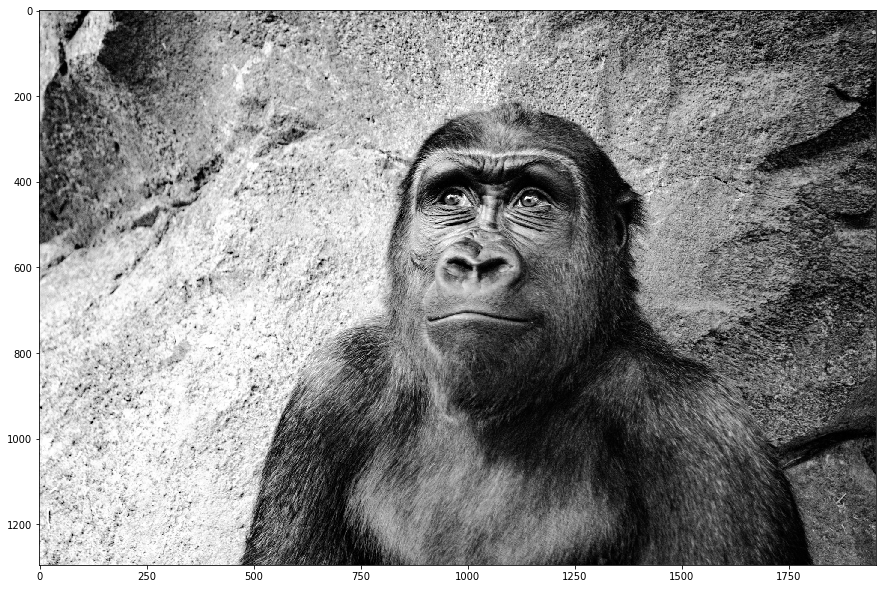

In [51]:
show_pic(eq_gorilla,cmap='gray')

In [52]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

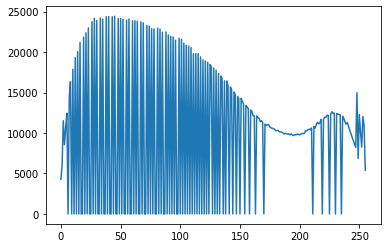

In [53]:
plt.plot(hist_values)

## Color Images

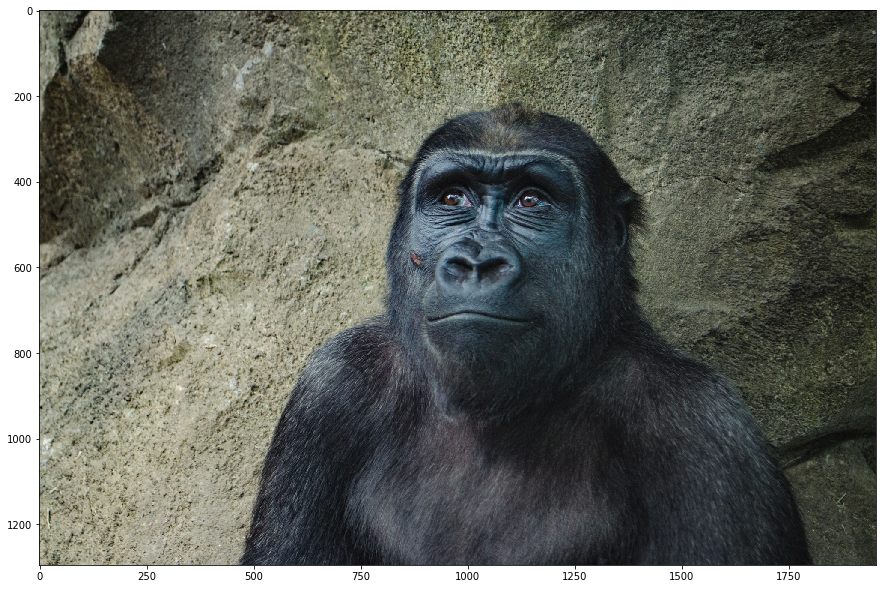

In [72]:
color_gorilla = cv2.imread('C:/Users/dell/Documents/Udemy OpenCV course/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
show_pic(show_gorilla)

# Convert to HSV colorspace
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

In [68]:
# Grab V channel
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [69]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

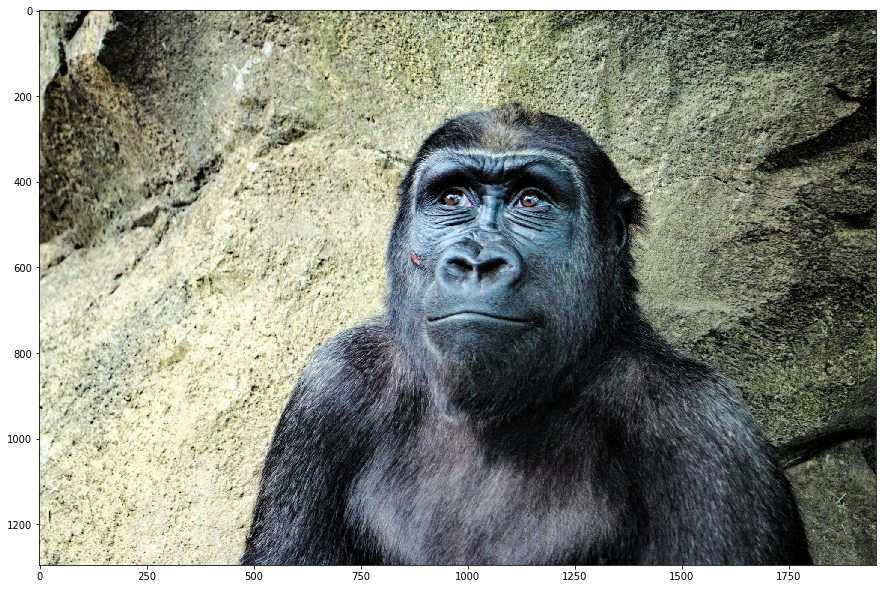

In [71]:
# Convert back to RGB to visualize
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
show_pic(eq_color_gorilla)

**https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/**